# La dataviz avec python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

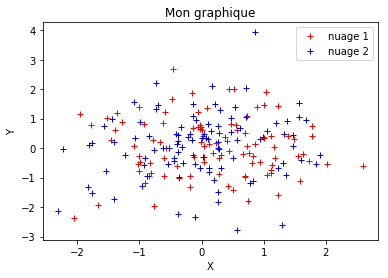

In [2]:
# on représente deux nuages de points sur le même graphique
plt.plot(np.random.randn(100),np.random.randn(100),'r+',label="nuage 1")
plt.title("Mon graphique")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.random.randn(100),np.random.randn(100),'b+', label="nuage 2")
plt.legend(loc=1)
#plt.show()

Saving figure mon_image


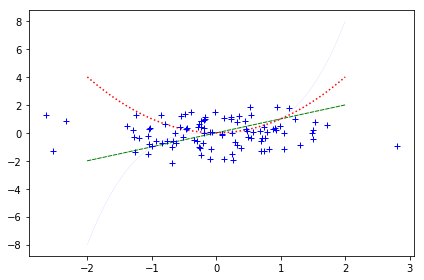

In [5]:
#on représente plusieurs courbes sur le même graphique
x = np.linspace(-2, 2, 1000)
#line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b-')
line1=plt.plot(x, x, 'g--')
line2=plt.plot(x, x**2, 'r:')
line3=plt.plot(x, x**3, 'b-')
line1[0].set_linewidth(1.0)
line1[0].set_dash_capstyle("round")
line3[0].set_alpha(0.2)
line3[0].set_linewidth(0.3)
plt.plot(np.random.randn(100),np.random.randn(100),'b+', label="nuage 2")
sauver_fig("mon_image",fig_extension="jpg")

In [6]:
def sauver_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300,
               path="./"):
    """Fonction servant à sauvegarder un graphique
    """    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path+fig_id+"."+fig_extension, format=fig_extension, dpi=resolution)

Générez un histogramme à partir de 2 échantillons de 10000 observations sur 100 intervalles


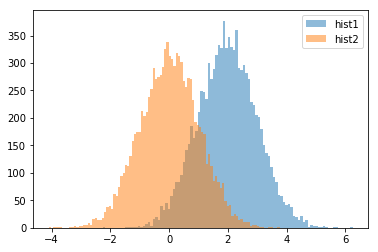

In [7]:
plt.hist((np.random.randn(10000)+2),bins=100,label="hist1",alpha=0.5)
plt.hist(np.random.randn(10000),bins=100, label="hist2", alpha=0.5)
plt.legend()

In [9]:
import seaborn as sns

In [11]:
iris=pd.read_excel("iris.xlsx")

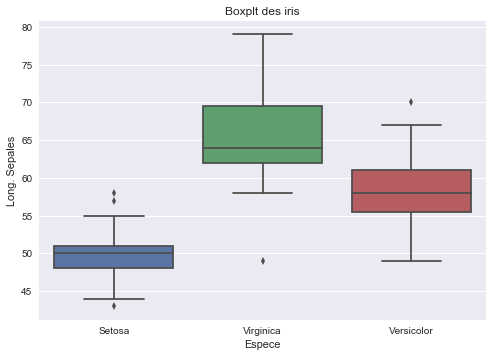

In [12]:
sns.boxplot("Espece","Long. Sepales",data=iris)
plt.title("Boxplt des iris")

In [13]:
iris.columns

Index(['Long. Sepales', 'Larg. Sepales', 'Long. Petales', 'Larg. Petales',
       'Espece'],
      dtype='object')

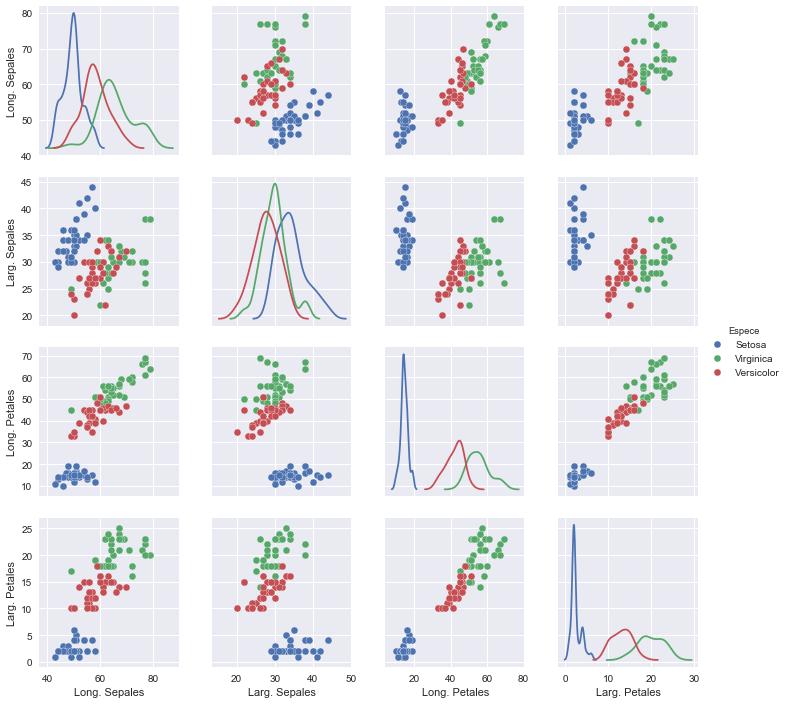

In [14]:
sns.pairplot(iris,hue="Espece",diag_kind='kde')

On récupère les données housing

In [16]:
frame_house=pd.read_csv("housing.csv")

In [17]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')

In [18]:
california_img.shape

(674, 594, 3)

On représente les points en latitude / longitude , la taille des points va dépendre de la population et la couleur du salaire médian

On ajoute un fond de carte venant de l'image california.png

Saving figure logements californie


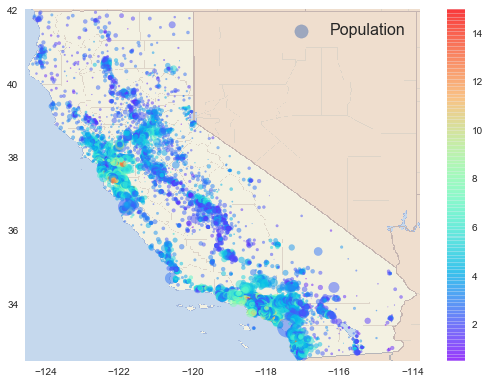

In [20]:
plt.scatter(x="longitude", y="latitude", s=frame_house['population']/100, label="Population",
                       c="median_income", cmap=plt.get_cmap("rainbow"),data=frame_house,
                       alpha=0.5)
#on supprime la grille
plt.grid()
#on affiche pas de détails pour les axes
#plt.axis('off')
#on affiche la barre de couleur
plt.colorbar()
#on colle le fond de carte derrière
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
#plt.ylabel("Latitude", fontsize=14)
#plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
sauver_fig("logements californie",fig_extension="jpg",resolution=600)

### Utilisation de bokeh

In [21]:
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

In [22]:
plot=figure()
plot.scatter(np.random.randn(1000),np.random.randn(1000))
plot.title="Mon graphqiue"
html= file_html(plot,CDN,'mon graphique')

output_file='graphique.html'

with open(output_file,'w') as f:
    f.write(html)

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: Setting Plot property 'title' using a string was deprecated in 0.12.0,
            and will be removed. The title is now an object on Plot (which holds all of it's
            styling properties). Please use Plot.title.text instead.

            SERVER USERS: If you were using plot.title to have the server update the plot title
            in a callback, you MUST update to plot.title.text as the title object cannot currently
            be replaced after initialization.
            
  warn(message)
